<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score, roc_curve

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [45]:
data = pd.read_csv('./train.csv')

In [46]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

# #1

In [47]:
data.loc[np.random.randint(data.shape[0], size = 10)]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3024,72,100.65,7334.05,Female,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Two year,No,Bank transfer (automatic),0
1010,12,20.50,255.5,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
5266,35,72.25,2568.55,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,Month-to-month,No,Electronic check,1
4668,68,20.05,1386.9,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0
2202,39,80.00,3182.95,Male,0,Yes,Yes,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),1
4928,3,34.25,139.35,Female,0,No,No,No,No phone service,DSL,Yes,No,No,Yes,No,No,Month-to-month,No,Mailed check,1
3777,41,45.20,1841.9,Female,0,No,Yes,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),0
3623,69,25.60,1673.4,Female,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),0
976,36,85.85,3003.55,Female,0,No,No,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),0
5126,52,100.30,5244.45,Female,0,Yes,Yes,Yes,No,Fiber optic,Yes,No,Yes,No,Yes,Yes,One year,No,Electronic check,0


# #2

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [49]:
len(data[data.TotalSpent == ' '])

9

In [50]:
data = data.replace(' ', np.nan)
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [51]:
data.TotalSpent = data.TotalSpent.astype(float)
data.TotalSpent.fillna(data.TotalSpent.mean(), inplace = True)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

# #1

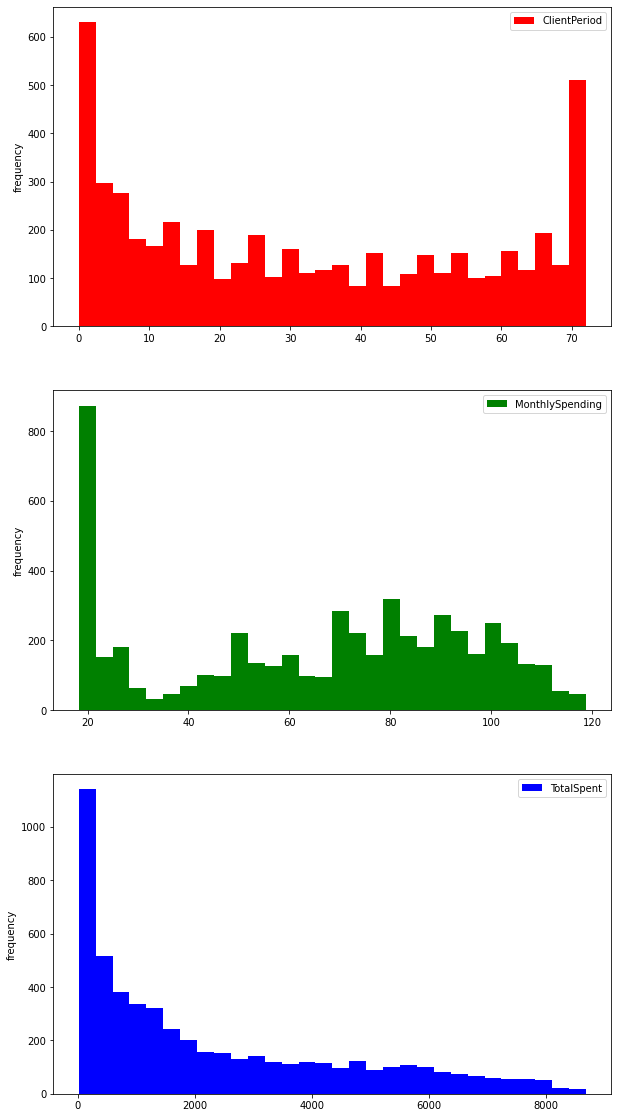

In [52]:
plt.figure(figsize=(10, 20))
colors = ['r', 'g', 'b']

for ind, feat in enumerate(num_cols):
    plt.subplot(3, 1, ind + 1)
    plt.hist(data[feat], color = colors[ind], bins = 30, label = feat)
    plt.ylabel('frequency')
    plt.legend()
plt.show()

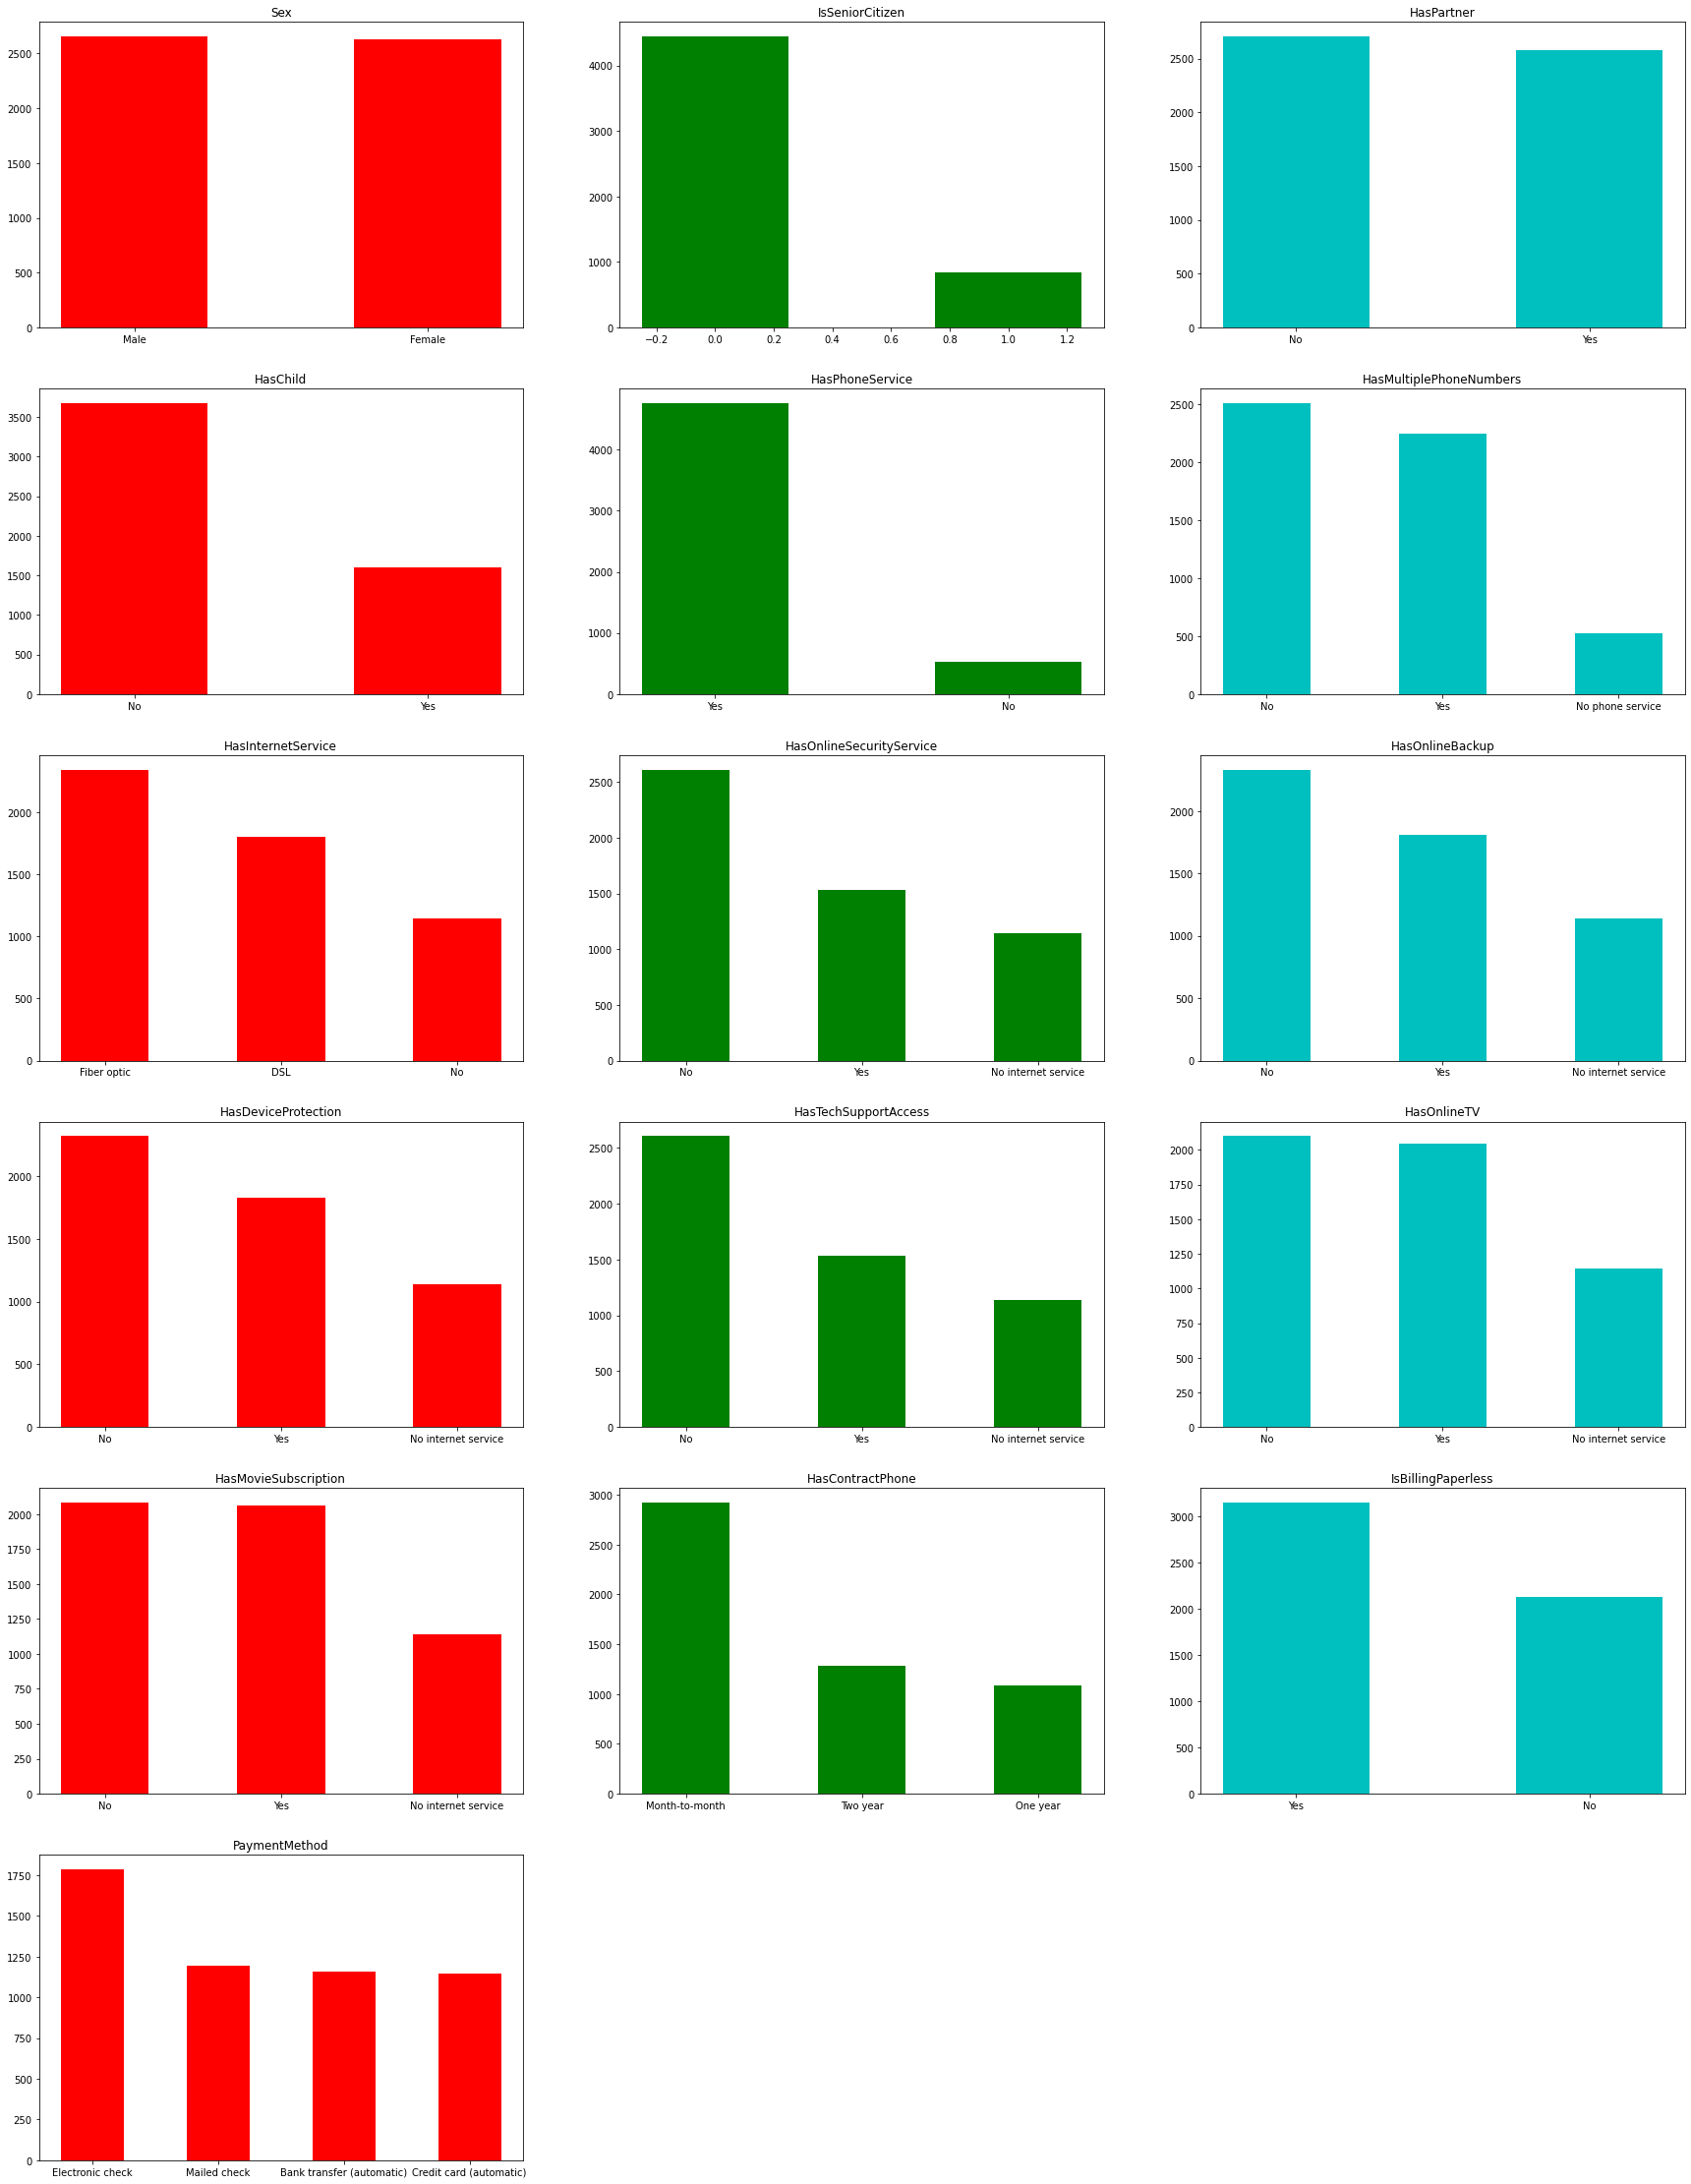

In [53]:
plt.figure(figsize=(30, 40))

colors = ['r', 'g', 'c']
for ind, feat in enumerate(cat_cols):
    plt.subplot(6, 3, ind + 1)
    counts = data[feat].value_counts()
    plt.bar(counts.index, counts.values, width = 0.5, color = colors[ind % 3])
    plt.title(feat)

plt.show()


# #2

2.816473988439306


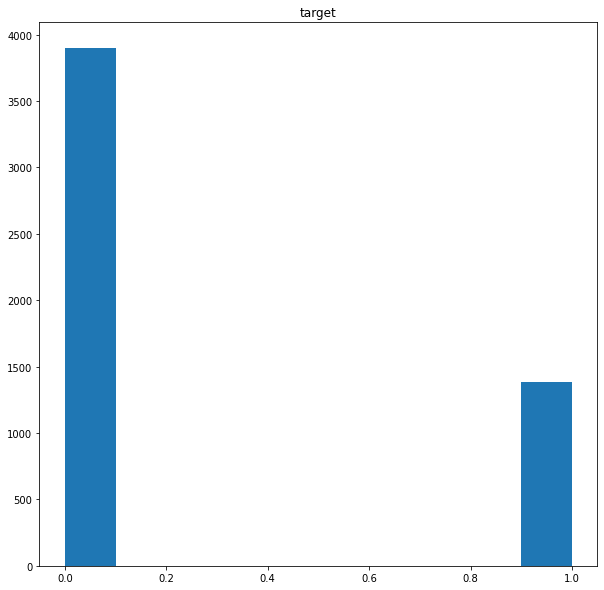

In [54]:
plt.figure(figsize = (10,10))
plt.hist(data[target_col])
plt.title('target')
print(len(data[data[target_col] == 0]) / len(data[data[target_col] == 1]))

Различие в долях классов некритично

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [55]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [56]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [57]:
encoded = pd.get_dummies(data[cat_cols])
encoded


,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,1
1,0,0,1,0,1,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
2,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
3,1,1,0,0,1,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
4,0,1,0,0,1,0,1,0,1,0,...,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0,0,1,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
5278,0,0,1,0,1,1,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
5279,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1
5280,0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [58]:
X = pd.concat([data[num_cols], encoded], axis = 1)

X_train, X_val, y_train, y_val = train_test_split(X, data[target_col], test_size = 0.2)

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])

C:\Users\Roman\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\Roman\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [59]:
Cs = [100, 10, 1, 0.1, 0.01, 0.001]

log_regressor = LogisticRegressionCV(Cs = Cs, cv = 5, scoring = 'roc_auc', refit = True, n_jobs = -1)
log_regressor.fit(X_train, y_train)
y_pred = log_regressor.predict_proba(X_val)
log_regressor.score(X_val, y_val)

0.8408376679670568

In [60]:
log_regressor.C_

array([10.])

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

$$roc-auc = 0.8408, C = 10$$

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [61]:
import catboost

# #1

In [62]:
X_train_origin, X_test_origin, y_train, y_test = train_test_split(data[feature_cols], data[target_col])

In [63]:
boost = catboost.CatBoostClassifier(cat_features = cat_cols)
boost.fit(X_train_origin, y_train)
y_train_pred = boost.predict_proba(X_train_origin)[:, 1]
y_test_pred = boost.predict_proba(X_test_origin)[:, 1]

Learning rate set to 0.081125
0:	learn: 0.6533304	total: 40.3ms	remaining: 8.03s
1:	learn: 0.6128028	total: 107ms	remaining: 10.6s
2:	learn: 0.5768999	total: 161ms	remaining: 10.6s
3:	learn: 0.5503325	total: 209ms	remaining: 10.3s
4:	learn: 0.5277707	total: 258ms	remaining: 10s
5:	learn: 0.5104832	total: 304ms	remaining: 9.84s
6:	learn: 0.4952408	total: 342ms	remaining: 9.43s
7:	learn: 0.4826879	total: 395ms	remaining: 9.48s
8:	learn: 0.4734988	total: 444ms	remaining: 9.41s
9:	learn: 0.4634434	total: 499ms	remaining: 9.49s
10:	learn: 0.4542040	total: 551ms	remaining: 9.46s
11:	learn: 0.4477536	total: 598ms	remaining: 9.37s
12:	learn: 0.4415542	total: 647ms	remaining: 9.31s
13:	learn: 0.4377697	total: 701ms	remaining: 9.32s
14:	learn: 0.4339461	total: 753ms	remaining: 9.29s
15:	learn: 0.4301651	total: 803ms	remaining: 9.23s
16:	learn: 0.4264841	total: 850ms	remaining: 9.15s
17:	learn: 0.4254215	total: 868ms	remaining: 8.77s
18:	learn: 0.4220861	total: 917ms	remaining: 8.73s
19:	learn: 0

In [64]:
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
test_auc

0.8398949644732777

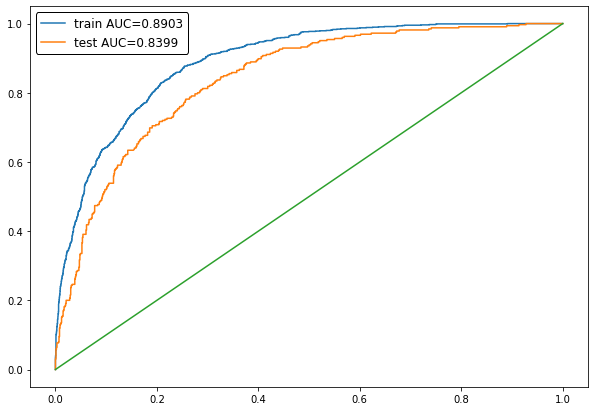

In [65]:
plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_pred)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_pred)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [66]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


# #2

In [67]:
boost = catboost.CatBoostClassifier(silent=True,
                                    cat_features=cat_cols,
                                    eval_metric='AUC')
boost.grid_search({'learning_rate': np.linspace(0, 0.2, 10), 'n_estimators': [100, 150, 200]}, 
                                  X_train_origin, 
                                  y_train, 
                                  plot=True, 
                                  refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.82107404
bestIteration = 99

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8210740	best: 0.8210740 (0)	total: 5.58s	remaining: 2m 41s

bestTest = 0.8226841315
bestIteration = 91

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8226841	best: 0.8226841 (1)	total: 10.7s	remaining: 2m 30s

bestTest = 0.8216954788
bestIteration = 61

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8216955	best: 0.8226841 (1)	total: 15.7s	remaining: 2m 21s

bestTest = 0.8265701419
bestIteration = 80

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8265701	best: 0.8265701 (3)	total: 21.1s	remaining: 2m 17s

bestT

{'params': {'iterations': 100, 'learning_rate': 0.17777777777777778},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,


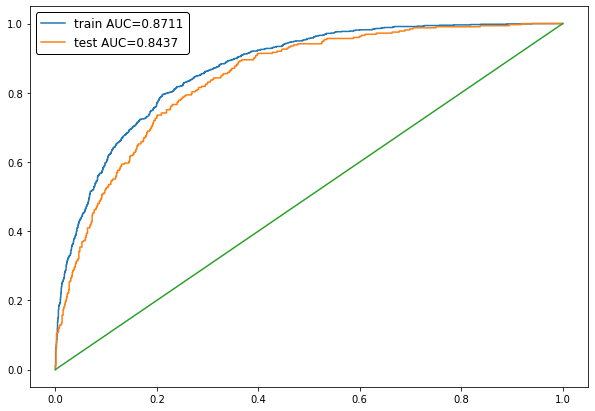

In [70]:
y_train_pred = boost.predict_proba(X_train_origin)[:, 1]
y_test_pred = boost.predict_proba(X_test_origin)[:, 1]

train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_pred)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_pred)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [71]:
iterations = 100
learning_rate = 0.17777777777777778
best_score = 0.8437

# Предсказания

In [72]:
best_model = catboost.CatBoostClassifier(iterations = 100, silent=True,
                                             cat_features=cat_cols,
                                             eval_metric='AUC', learning_rate = learning_rate)
best_model.fit(X_train_origin, y_train)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

In [74]:
print(roc_auc_score(y_test, boost.predict_proba(X_test_origin)[:, 1]))
print(roc_auc_score(y_test, best_model.predict_proba(X_test_origin)[:, 1]))

0.8436700648748843
0.8436700648748843


In [75]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.head()
submission.to_csv('./my_submission.csv', index = False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.